In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

#— User parameters (edit these directly) —
FILE_PATH = "data.txt"    # path to your three-column x y z file
L = 150.0                   # threshold value for z

# 1) Load data
data = np.loadtxt(FILE_PATH)
x, y, z = data[:,0], data[:,1], data[:,2]
N = len(z)

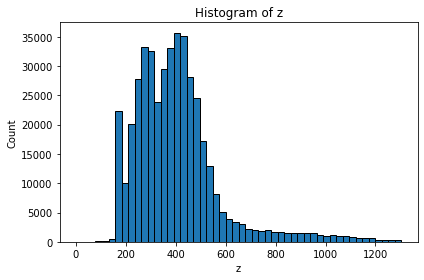

In [2]:
# 2) Histogram & cumulative distribution of z
n_bins = 50
hist, bins = np.histogram(z, bins=n_bins)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Save histogram
np.savetxt("histo.txt",
np.column_stack((bin_centers, hist)),
header="z_center count", comments='')

# Compute & save cumulative distribution
cum_counts = np.cumsum(hist)
cum_dist   = cum_counts / cum_counts[-1]
np.savetxt("cumulative.txt",
           np.column_stack((bin_centers, cum_dist)),
           header="z_center cumulative_prob", comments='')

# Plot histogram of z
plt.figure(figsize=(6,4))
plt.bar(bin_centers, hist,
            width=(bins[1]-bins[0]),
            color='C0', edgecolor='black')
plt.xlabel("z")
plt.ylabel("Count")
plt.title("Histogram of z")
plt.tight_layout()
plt.show()

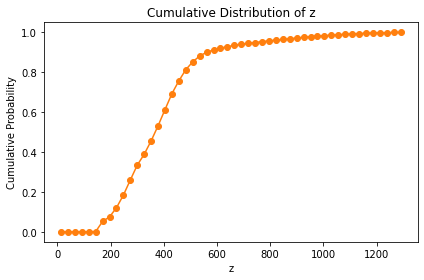

In [3]:
# Plot cumulative distribution of z
plt.figure(figsize=(6,4))
plt.plot(bin_centers, cum_dist,
             marker='o', color='C1')
plt.xlabel("z")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution of z")
plt.tight_layout()
plt.show()

Points with z ≤ 150.0: 499 of 438750
Number of clusters found: 9


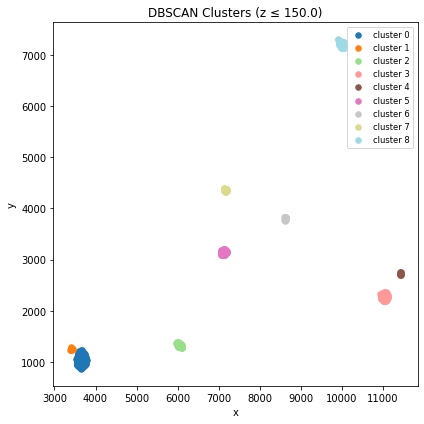

In [4]:
# 3) Threshold and extract (x,y)
mask  = (z <= L)
coords = np.column_stack((x[mask], y[mask]))
print(f"Points with z ≤ {L}: {coords.shape[0]} of {N}")

# 4) Cluster low-z points with DBSCAN
db     = DBSCAN(eps=30.0, min_samples=5)
labels = db.fit_predict(coords)
# only true clusters, drop noise=-1
unique_labels = sorted(l for l in set(labels) if l != -1)
#unique_labels = sorted(set(labels))
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap("tab20", n_labels)  # “tab20” has up to 20 distinct colors
# Print number of clusters (excluding noise label = –1)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Number of clusters found: {n_clusters}")

plt.figure(figsize=(6,6))
for idx, lbl in enumerate(unique_labels):
    pts = coords[labels == lbl]
    color = cmap(idx)
    lbl_name = "noise" if lbl == -1 else f"cluster {lbl}"
    plt.scatter(pts[:,0], pts[:,1],
                c=[color], s=30,
               label=lbl_name)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"DBSCAN Clusters (z ≤ {L})")
plt.legend(loc='best', fontsize='small')
plt.tight_layout()
plt.show()

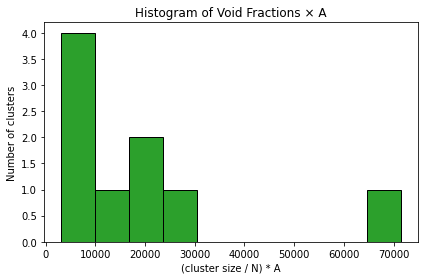

In [5]:
# 5) Compute area factor A and cluster fractions
A = (np.max(x)-np.min(x)) * (np.max(y)-np.min(y))
frac_vals = []
for lbl in unique_labels:
    if lbl == -1:
        continue
    size = np.sum(labels == lbl)
    frac_vals.append((size / N) * A)
frac_vals = np.array(frac_vals)

# Histogram of (cluster_size/N) * A
nb = 10
f_hist, f_bins = np.histogram(frac_vals, bins=nb)
f_centers = (f_bins[:-1] + f_bins[1:]) / 2

# Save voids histogram
np.savetxt("voids.txt",
           np.column_stack((f_centers, f_hist)),
           header="(cluster_size/N)*A count", comments='')

# Plot voids histogram
plt.figure(figsize=(6,4))
plt.bar(f_centers, f_hist,
        width=(f_bins[1]-f_bins[0]),
        color='C2', edgecolor='black')
plt.xlabel("(cluster size / N) * A")
plt.ylabel("Number of clusters")
plt.title("Histogram of Void Fractions × A")
plt.tight_layout()
plt.show()